In [17]:
# read data
import pandas as pd

block_0=pd.read_csv("block_0.csv")
block_0_daily=pd.read_csv("block_0_daily.csv")
weather_df=pd.read_csv("weather_hourly_darksky.csv")

In [2]:
# select one building based on user id
df=block_0[block_0['LCLid']=="MAC000246"]

In [3]:
df.head()

,LCLid,tstp,energy(kWh/hh)
24141,MAC000246,03/12/2011 09:00,0.149
24142,MAC000246,03/12/2011 09:30,0.154
24143,MAC000246,03/12/2011 10:00,0.768
24144,MAC000246,03/12/2011 10:30,1.179
24145,MAC000246,03/12/2011 11:00,0.588


In [4]:
# Convert 'tstp' column to datetime format
df['tstp'] = pd.to_datetime(df['tstp'], format='%d/%m/%Y %H:%M')

# Set 'tstp' as the index
df.set_index('tstp', inplace=True)

# Generate a date range covering the expected time period
start_time = df.index.min()
end_time = df.index.max()
expected_date_range = pd.date_range(start=start_time, end=end_time, freq='30T')  # 30 minutes frequency

# Check for missing date and time values in the main dataframe 
missing_date_times = expected_date_range[~expected_date_range.isin(df.index)]

print("Missing date and time values:")
print(missing_date_times)

Missing date and time values:
DatetimeIndex(['2012-10-18 11:00:00', '2013-05-31 08:00:00',
               '2013-12-09 10:30:00'],
              dtype='datetime64[ns]', freq=None)


C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_38284\3507834190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tstp'] = pd.to_datetime(df['tstp'], format='%d/%m/%Y %H:%M')


In [5]:
# Fill missing date and time values using linear interpolation
df = df.reindex(expected_date_range)
df['energy(kWh/hh)'] = df['energy(kWh/hh)'].interpolate(method='time')

print("Updated DataFrame with missing values filled:")
print(df)


Updated DataFrame with missing values filled:
                         LCLid energy(kWh/hh)
2011-12-03 09:00:00  MAC000246          0.149
2011-12-03 09:30:00  MAC000246          0.154
2011-12-03 10:00:00  MAC000246          0.768
2011-12-03 10:30:00  MAC000246          1.179
2011-12-03 11:00:00  MAC000246          0.588
...                        ...            ...
2014-02-27 22:00:00  MAC000246      2.4360001
2014-02-27 22:30:00  MAC000246           1.12
2014-02-27 23:00:00  MAC000246          0.701
2014-02-27 23:30:00  MAC000246          0.223
2014-02-28 00:00:00  MAC000246          0.145

[39247 rows x 2 columns]


In [7]:
df

,LCLid,energy(kWh/hh)
2011-12-03 09:00:00,MAC000246,0.149
2011-12-03 09:30:00,MAC000246,0.154
2011-12-03 10:00:00,MAC000246,0.768
2011-12-03 10:30:00,MAC000246,1.179
2011-12-03 11:00:00,MAC000246,0.588
...,...,...
2014-02-27 22:00:00,MAC000246,2.436
2014-02-27 22:30:00,MAC000246,1.120
2014-02-27 23:00:00,MAC000246,0.701
2014-02-27 23:30:00,MAC000246,0.223


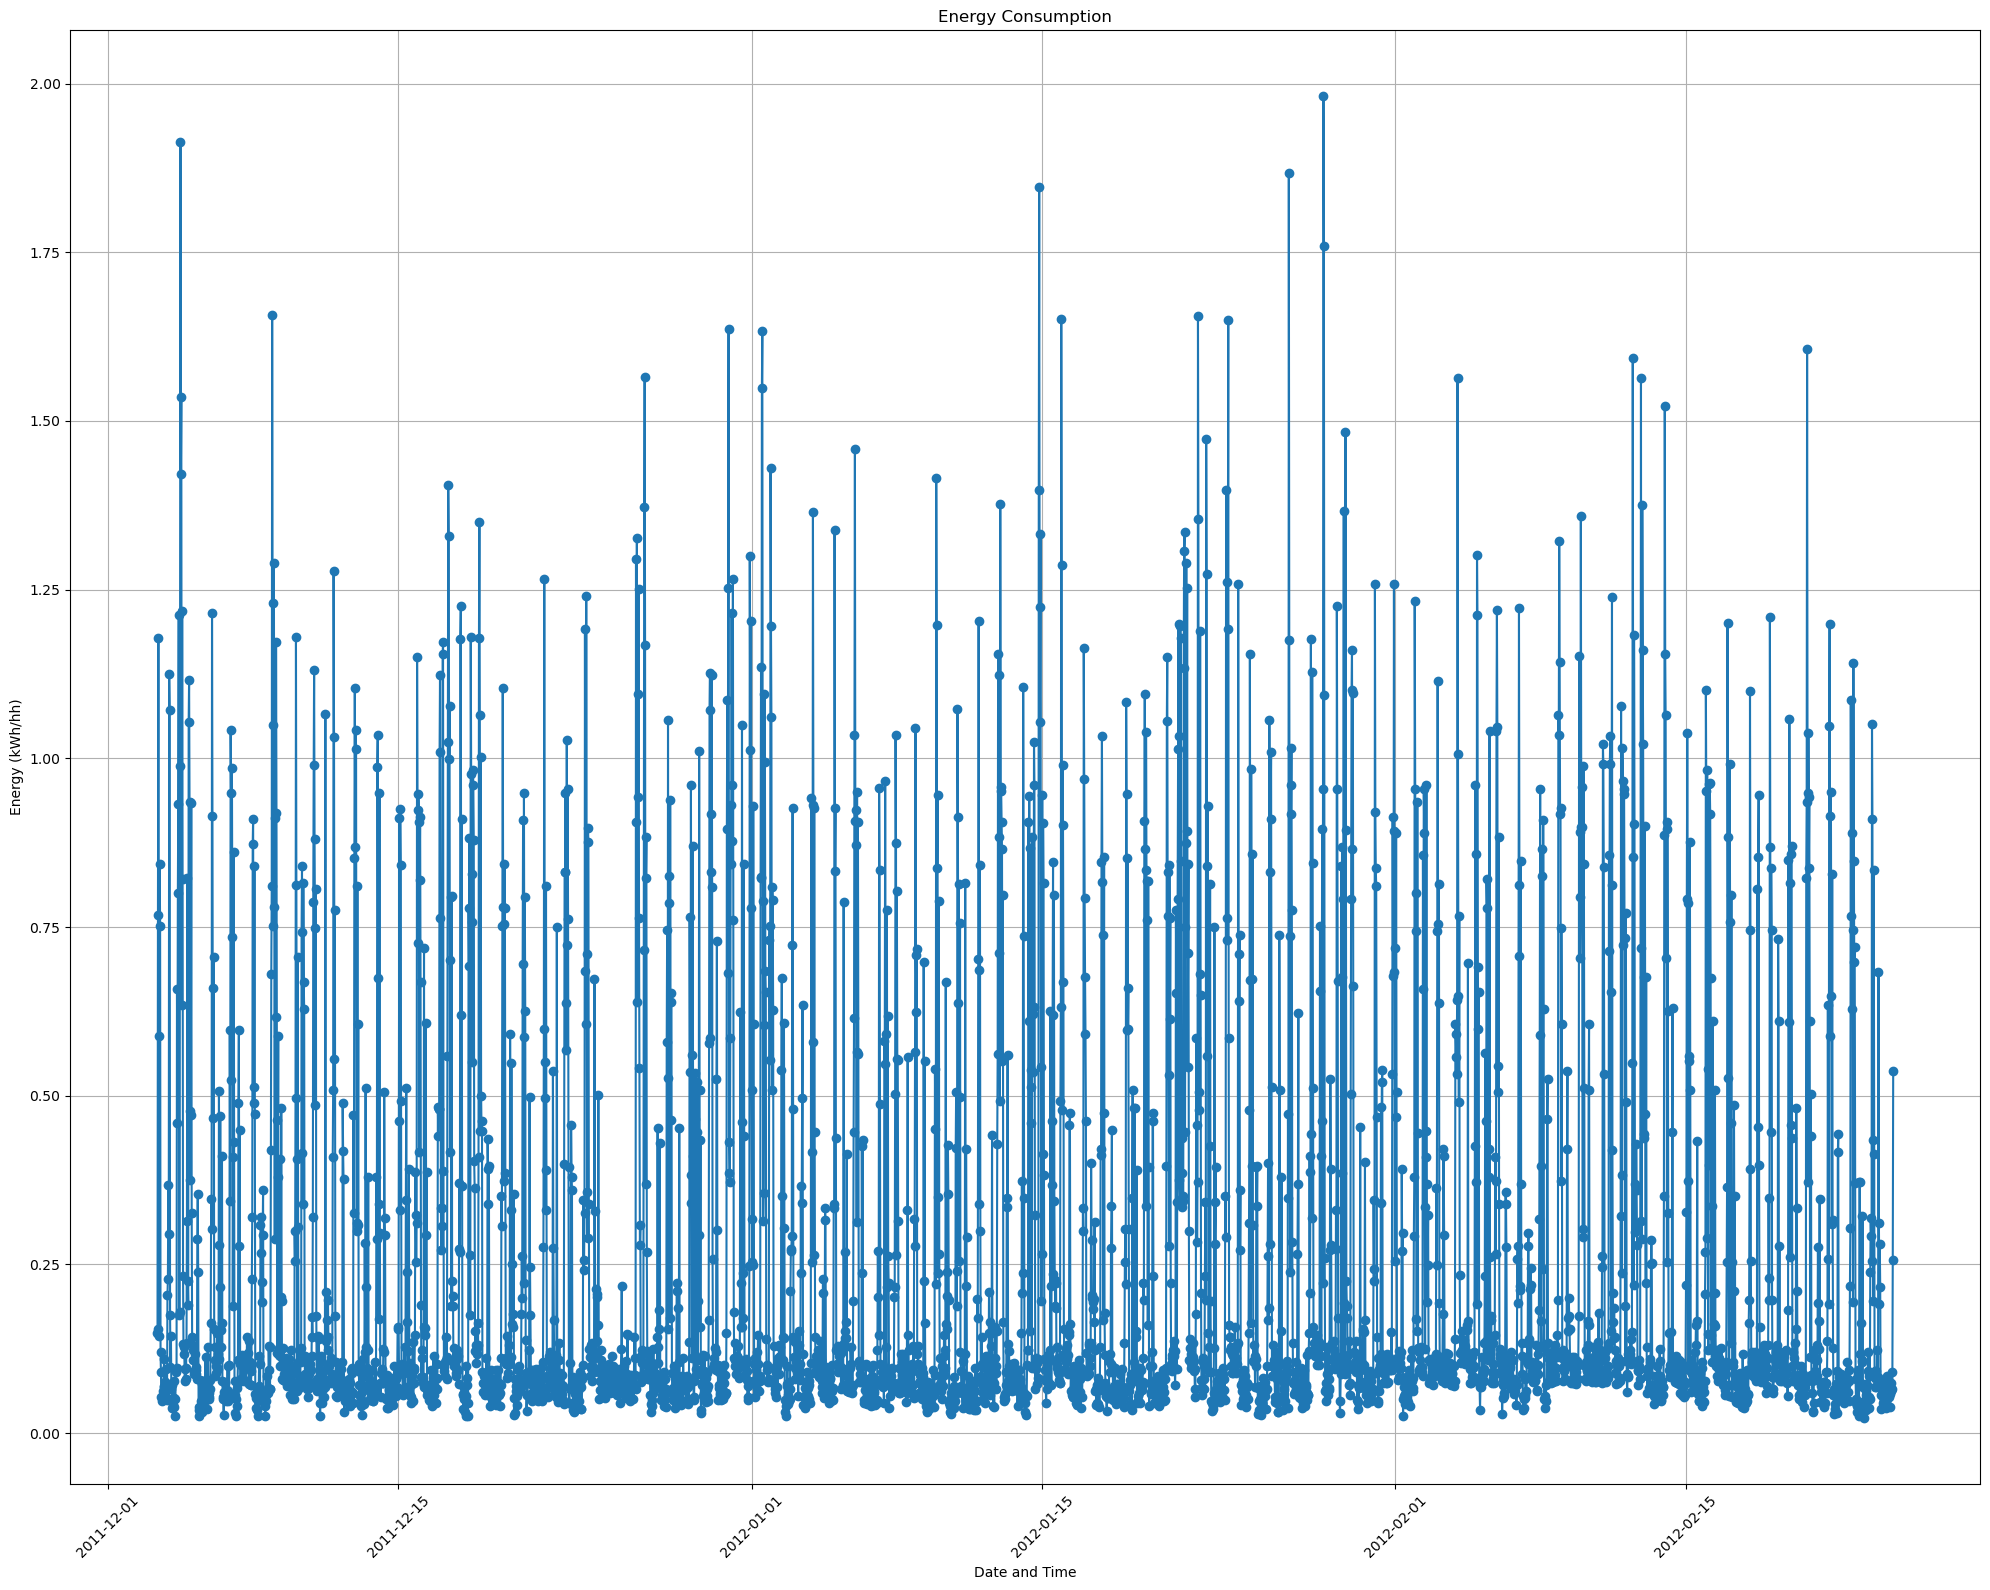

In [13]:
import matplotlib.pyplot as plt


df['energy(kWh/hh)'] = pd.to_numeric(df['energy(kWh/hh)'], errors='coerce')


# Filter the DataFrame for one week of data
one_week_data = df['energy(kWh/hh)']['2011-12-03':'2012-02-24']


# Plot the data
plt.figure(figsize=(20, 16))
plt.plot(one_week_data.index, one_week_data.values, marker='o', linestyle='-')
plt.title('Energy Consumption')
plt.xlabel('Date and Time')
plt.ylabel('Energy (kWh/hh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
weather_df

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


In [18]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Set 'time' as the index
weather_df['time'] = pd.to_datetime(weather_df['time'])  # Convert 'time' to datetime
weather_df.set_index('time', inplace=True)

# Step 2: Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()

# Apply label encoding to 'precipType,' 'icon,' and 'summary'
weather_df['precipType'] = label_encoder.fit_transform(weather_df['precipType'])
weather_df['icon'] = label_encoder.fit_transform(weather_df['icon'])
weather_df['summary'] = label_encoder.fit_transform(weather_df['summary'])

# Display the modified DataFrame
print(weather_df)

                     visibility  windBearing  temperature  dewPoint  pressure  \
time                                                                            
2011-11-11 00:00:00        5.97          104        10.24      8.86   1016.76   
2011-11-11 01:00:00        4.88           99         9.76      8.83   1016.63   
2011-11-11 02:00:00        3.70           98         9.46      8.79   1016.36   
2011-11-11 03:00:00        3.12           99         9.23      8.63   1016.28   
2011-11-11 04:00:00        1.85          111         9.26      9.21   1015.98   
...                         ...          ...          ...       ...       ...   
2014-02-15 19:00:00       12.68          247         7.39      3.06    997.07   
2014-02-15 20:00:00       13.78          249         6.56      2.76    998.15   
2014-02-15 21:00:00       14.31          248         6.47      2.71    999.28   
2014-02-15 22:00:00       14.31          248         5.96      2.69   1000.33   
2014-02-15 23:00:00       14

In [21]:
# Resample 'df' to one-hour resolution and sum the values
df_resampled = df.resample('1H').sum()

# Merge the resampled 'df' with 'weather_df' based on the index (time)
merged_df = pd.merge(df_resampled, weather_df, left_index=True, right_index=True, how='inner')

# Display the merged DataFrame
print(merged_df)

                     energy(kWh/hh)  visibility  windBearing  temperature  \
2011-12-03 09:00:00           0.303       13.07          262        11.00   
2011-12-03 10:00:00           1.947       12.76          268        11.42   
2011-12-03 11:00:00           0.732       13.07          274        11.41   
2011-12-03 12:00:00           1.595       13.07          277        11.33   
2011-12-03 13:00:00           0.210       13.07          277        11.41   
...                             ...         ...          ...          ...   
2014-02-27 20:00:00           0.550       14.03          220         5.94   
2014-02-27 21:00:00           2.884       16.09          217         5.03   
2014-02-27 22:00:00           3.556       14.00          216         4.10   
2014-02-27 23:00:00           0.924       14.03          200         3.93   
2014-02-28 00:00:00           0.145       12.63          190         3.81   

                     dewPoint  pressure  apparentTemperature  windSpeed  \


C:\Users\saeed.misaghian\AppData\Local\Temp\ipykernel_38284\3185326925.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('1H').sum()


In [22]:
merged_df.head()

,energy(kWh/hh),visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
2011-12-03 09:00:00,0.303,13.07,262,11.00,8.84,1002.07,11.00,5.99,0,4,0.87,8
2011-12-03 10:00:00,1.947,12.76,268,11.42,7.52,1002.76,11.42,6.10,0,4,0.77,8
2011-12-03 11:00:00,0.732,13.07,274,11.41,6.39,1003.24,11.41,6.20,0,4,0.71,8
2011-12-03 12:00:00,1.595,13.07,277,11.33,5.42,1003.22,11.33,6.60,0,4,0.67,8
2011-12-03 13:00:00,0.210,13.07,277,11.41,5.07,1003.29,11.41,7.05,0,4,0.65,8


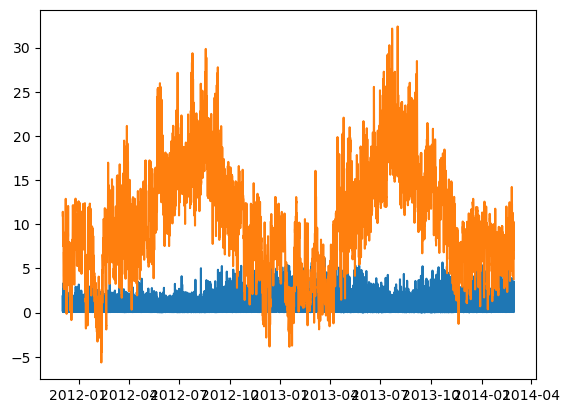

In [26]:
plt.plot(merged_df['energy(kWh/hh)'])
plt.plot(merged_df['temperature'])

In [27]:
merged_df.to_csv('merged_data.csv')


',energy(kWh/hh),visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary\r\n2011-12-03 09:00:00,0.303,13.07,262,11.0,8.84,1002.07,11.0,5.99,0,4,0.87,8\r\n2011-12-03 10:00:00,1.947,12.76,268,11.42,7.52,1002.76,11.42,6.1,0,4,0.77,8\r\n2011-12-03 11:00:00,0.732,13.07,274,11.41,6.39,1003.24,11.41,6.2,0,4,0.71,8\r\n2011-12-03 12:00:00,1.595,13.07,277,11.33,5.42,1003.22,11.33,6.6,0,4,0.67,8\r\n2011-12-03 13:00:00,0.21,13.07,277,11.41,5.07,1003.29,11.41,7.05,0,4,0.65,8\r\n2011-12-03 14:00:00,0.106,13.07,277,11.28,3.39,1003.62,11.28,6.51,0,4,0.58,8\r\n2011-12-03 15:00:00,0.097,13.52,266,10.42,3.61,1004.19,10.42,6.08,0,4,0.63,8\r\n2011-12-03 16:00:00,0.132,13.52,260,10.09,3.29,1004.3,10.09,4.65,0,5,0.63,8\r\n2011-12-03 17:00:00,0.18,13.45,252,9.79,3.68,1004.64,7.75,4.0,0,5,0.66,8\r\n2011-12-03 18:00:00,0.152,13.02,253,9.06,4.31,1005.09,6.66,4.4,0,5,0.72,8\r\n2011-12-03 19:00:00,0.158,12.86,251,8.16,4.66,1004.96,5.65,4.19,0,5,0.79,8\r\n